# Setting up my environment:

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")

# Reading in my data
Then viewing the first few rows of data to get an idea of what it looks like...

In [2]:
df = pd.read_csv('YCOM_2016_Data.csv')
df.head()

,GeoType,GEOID,GeoName,TotalPop,discuss,discussOppose,CO2limits,CO2limitsOppose,trustclimsciSST,trustclimsciSSTOppose,...,harmUS,harmUSOppose,devharm,devharmOppose,futuregen,futuregenOppose,harmplants,harmplantsOppose,timing,timingOppose
0,National,9999,US,209056129,33.495,31.081,69.376,29.386,71.199,26.163,...,57.918,32.747,62.892,25.457,69.848,19.203,69.344,20.506,50.968,48.635
1,State,1,Alabama,3217902,27.468,38.892,63.122,35.589,66.416,30.717,...,52.079,35.565,56.025,28.731,61.881,23.292,61.369,24.528,46.644,52.978
2,State,2,Alaska,460319,36.632,28.074,68.231,31.123,65.712,29.466,...,55.117,37.327,61.542,28.235,66.820,22.328,69.005,23.129,48.295,51.022
3,State,4,Arizona,4284776,36.724,28.882,66.001,32.625,70.357,28.190,...,57.669,34.217,61.654,27.729,67.368,22.051,66.647,23.685,50.683,49.168
4,State,5,Arkansas,1949963,28.832,37.666,63.744,35.166,65.852,31.749,...,52.120,36.455,57.397,29.640,63.825,24.254,63.853,24.197,46.276,53.327


# Looking at all the unique items in GeoTypes:

National, State, Country, cd113, CBSA

The number of each can be seen in allTypesCount

In [3]:
allGeoTypes = df.GeoType.unique()
print(allGeoTypes)

['National' 'State' 'County' 'cd113' 'CBSA']


In [4]:
allTypesCount = df['GeoType'].value_counts()
print(allTypesCount)

County      3142
CBSA         916
cd113        435
State         51
National       1
Name: GeoType, dtype: int64


# Creating a data frame for GeoType State

In [5]:
df_state = df[df["GeoType"] == "State"]
df_state.head()

,GeoType,GEOID,GeoName,TotalPop,discuss,discussOppose,CO2limits,CO2limitsOppose,trustclimsciSST,trustclimsciSSTOppose,...,harmUS,harmUSOppose,devharm,devharmOppose,futuregen,futuregenOppose,harmplants,harmplantsOppose,timing,timingOppose
1,State,1,Alabama,3217902,27.468,38.892,63.122,35.589,66.416,30.717,...,52.079,35.565,56.025,28.731,61.881,23.292,61.369,24.528,46.644,52.978
2,State,2,Alaska,460319,36.632,28.074,68.231,31.123,65.712,29.466,...,55.117,37.327,61.542,28.235,66.820,22.328,69.005,23.129,48.295,51.022
3,State,4,Arizona,4284776,36.724,28.882,66.001,32.625,70.357,28.190,...,57.669,34.217,61.654,27.729,67.368,22.051,66.647,23.685,50.683,49.168
4,State,5,Arkansas,1949963,28.832,37.666,63.744,35.166,65.852,31.749,...,52.120,36.455,57.397,29.640,63.825,24.254,63.853,24.197,46.276,53.327
5,State,6,California,24865866,39.309,25.920,73.740,24.959,72.822,23.120,...,64.548,27.195,69.022,20.391,75.097,14.919,74.674,16.127,56.197,43.306


# Viewing a Summary of the Data in the State Data Frame

In [6]:
colNames = df.columns
stateSummary = df_state.describe()
stateSummary

,GEOID,TotalPop,discuss,discussOppose,CO2limits,CO2limitsOppose,trustclimsciSST,trustclimsciSSTOppose,regulate,regulateOppose,...,harmUS,harmUSOppose,devharm,devharmOppose,futuregen,futuregenOppose,harmplants,harmplantsOppose,timing,timingOppose
count,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,28.960784,4.099140e+06,33.351863,31.011647,67.663137,31.159373,70.369490,27.086431,73.940510,24.918510,...,56.099725,34.790275,61.412216,27.174627,68.709745,20.667941,68.129627,22.102098,49.158725,50.441902
std,15.832828,4.598079e+06,3.951163,4.414686,6.006780,6.266996,4.345906,4.261625,3.926158,4.081739,...,5.278345,5.041608,5.873408,4.672013,5.540837,4.368161,5.422478,4.595241,4.784197,4.849616
min,1.000000,3.810980e+05,27.468000,21.721000,55.252000,14.110000,61.881000,12.884000,66.421000,12.367000,...,45.177000,19.496000,50.906000,12.237000,58.537000,7.468000,59.526000,8.409000,38.934000,34.287000
25%,16.500000,1.110358e+06,30.392500,27.737500,64.298000,27.642500,66.811000,24.954000,70.608000,22.652500,...,52.202000,31.856500,56.725500,24.973500,64.323500,18.028500,63.178500,19.882500,46.460000,47.695500
50%,29.000000,2.939709e+06,33.076000,30.816000,67.538000,31.205000,70.803000,26.756000,74.374000,24.722000,...,56.009000,34.217000,61.542000,27.122000,68.822000,20.472000,68.082000,21.773000,49.115000,50.436000
75%,41.500000,4.603575e+06,36.402500,33.439000,70.762500,34.840500,72.858000,30.236000,76.433000,28.151000,...,59.161500,38.092500,65.324000,29.619500,72.361000,23.784000,71.569000,24.425500,51.879500,53.217500
max,56.000000,2.486587e+07,43.448000,39.344000,84.652000,45.070000,84.786000,35.326000,86.167000,33.187000,...,72.026000,46.543000,80.246000,36.607000,85.330000,30.815000,85.250000,31.874000,64.720000,60.506000


# Looking at Specifics...

Such as the state with the hightest population (California) and lowest population (Wyoming).

Also looking at the 3 states that report discussing Global Warning the most and least.

In [7]:
highestPop = max(df_state["TotalPop"])
highestPopCountry = df_state[df_state["TotalPop"] == highestPop].GeoName.item()

lowestPop = min(df_state["TotalPop"])
lowestPopCountry = df_state[df_state["TotalPop"] == lowestPop].GeoName.item()

print("The country with the highest population is " + str(highestPopCountry) + " with a population of " + str(highestPop) + ".")
print("The country with the lowest population is " + str(lowestPopCountry) + " with a population of " + str(lowestPop) + ".")

The country with the highest population is California with a population of 24865866.
The country with the lowest population is Wyoming with a population of 381098.


In [8]:
discussSort = df_state.sort_values(by = ["discuss"], ascending = False)
state_1 = discussSort.iloc[0, :].GeoName
state_2 = discussSort.iloc[1, :].GeoName
state_3 = discussSort.iloc[2, :].GeoName

state_neg1 = discussSort.iloc[-1, :].GeoName
state_neg2 = discussSort.iloc[-2, :].GeoName
state_neg3 = discussSort.iloc[-3, :].GeoName

print("The 3 states which report discussing Global Warming the most are: " + str(state_1) + ", " + str(state_2) + ", and " + str(state_3))
print("The 3 states which report discussing Global Warming the least are: "+ str(state_neg1) + ", " + str(state_neg2) + ", and " + str(state_neg3))

The 3 states which report discussing Global Warming the most are: District of Columbia, Hawaii, and California
The 3 states which report discussing Global Warming the least are: Alabama, West Virginia, and Mississippi


# Pivoting Data from Wide to Long

I know this is probably not the ideal/usual way to do this, but I've never pivotted a data set before so instead of looking it up I just did it my own way :)

I did see a few methods like panas.melt() and pandas.wide_to_long() which I would have looked into if I had some extra time.

In [9]:
new_df = df_state.iloc[:, 0:4]
column_names_survey = df_state.columns[4:]
newdf = pd.DataFrame(np.repeat(new_df.values,2,axis=0))
newdf.columns = new_df.columns

i = 0
while i < len(column_names_survey):
    support_list = [] # add Support then Oppose
    topic_list = [] # add topic then topic oppose value
    j = 0
    while j < 51:
        support_list = support_list + ["Support"]
        # topic = round(df_state[column_names_survey].iloc[j, i]), 3)
        topic_list = topic_list + [str(round(df_state[column_names_survey].iloc[j, i], 3))]
        support_list = support_list + ["Oppose"]
        topic_list = topic_list + [str(round(df_state[column_names_survey].iloc[j, i + 1], 3))]
        j += 1
    newdf['Opinion'] = support_list
    newdf[column_names_survey[i]] = topic_list
    i += 2
    
newdf.head()

,GeoType,GEOID,GeoName,TotalPop,Opinion,discuss,CO2limits,trustclimsciSST,regulate,supportRPS,...,happening,human,consensus,worried,personal,harmUS,devharm,futuregen,harmplants,timing
0,State,1,Alabama,3217902,Support,27.468,63.122,66.416,69.962,60.343,...,63.45,47.603,40.418,50.584,35.646,52.079,56.025,61.881,61.369,46.644
1,State,1,Alabama,3217902,Oppose,38.892,35.589,30.717,28.737,39.147,...,15.467,36.405,31.368,49.383,50.312,35.565,28.731,23.292,24.528,52.978
2,State,2,Alaska,460319,Support,36.632,68.231,65.712,73.098,62.506,...,69.588,48.562,46.767,55.695,36.78,55.117,61.542,66.82,69.005,48.295
3,State,2,Alaska,460319,Oppose,28.074,31.123,29.466,25.761,35.846,...,15.05,35.949,33.881,43.786,54.919,37.327,28.235,22.328,23.129,51.022
4,State,4,Arizona,4284776,Support,36.724,66.001,70.357,72.84,64.86,...,68.827,50.661,48.257,56.186,40.135,57.669,61.654,67.368,66.647,50.683


## Exporting as a CSV...

In [24]:
# newdf.to_csv('DDEL_appTestData.csv')

# Mean Rate for discuss and discussOppose for all States

In [13]:
# mean rate for discuss and discussOppose for ALL STATES in df_state
discuss_mean = round(df_state["discuss"].mean(), 3)
discussOppose_mean = round(df_state["discussOppose"].mean(), 3)

print("The mean rate for discuss for all states is " + str(discuss_mean))
print("The mean rate for discussOppose for all states is " + str(discussOppose_mean))

The mean rate for discuss for all states is 33.352
The mean rate for discussOppose for all states is 31.012


# Boxplot! 

I would probably do a more clear/specific title usually but I wanted to make it fit nicely.

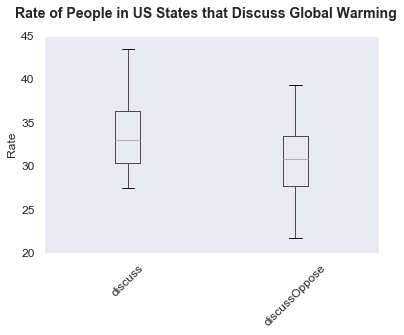

In [21]:
fig = plt.figure()
fig.suptitle('Rate of People in US States that Discuss Global Warming', fontsize=14, fontweight='bold')
boxplot = df_state.boxplot(column=['discuss', 'discussOppose'], grid=False, rot=45, fontsize=12)
boxplot.set_ylabel('Rate')
plt.ylim(20, 45)

plt.show()

# Thanks for reading!

I've never used Jupyter Notebooks or Pandas like this, and even if I don't get to work with the Data Driven EnviroLab, I'm very grateful for the opportunity to apply and learn a little more about data science along the way!